In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
gender_df = tips.groupby(['day','sex'])['day'].count()
gender_df = gender_df.to_frame(name='count')

gender_df = gender_df.reset_index()
pd.DataFrame(gender_df)

C:\Users\kne12\AppData\Local\Temp\ipykernel_3688\230230872.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_df = tips.groupby(['day','sex'])['day'].count()


,day,sex,count
0,Thur,Male,30
1,Thur,Female,32
2,Fri,Male,10
3,Fri,Female,9
4,Sat,Male,59
5,Sat,Female,28
6,Sun,Male,58
7,Sun,Female,18


In [3]:
smoke_df = tips.groupby(['day','smoker'])['day'].count()
smoke_df = smoke_df.to_frame(name='count')

smoke_df = smoke_df.reset_index()
pd.DataFrame(smoke_df)

C:\Users\kne12\AppData\Local\Temp\ipykernel_3688\1048055249.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoke_df = tips.groupby(['day','smoker'])['day'].count()


,day,smoker,count
0,Thur,Yes,17
1,Thur,No,45
2,Fri,Yes,15
3,Fri,No,4
4,Sat,Yes,42
5,Sat,No,45
6,Sun,Yes,19
7,Sun,No,57


In [4]:
time_df = tips.groupby(['day','time'])['day'].count()
time_df = time_df.to_frame(name='count')

time_df = time_df.reset_index()
pd.DataFrame(time_df)

C:\Users\kne12\AppData\Local\Temp\ipykernel_3688\3820729728.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_df = tips.groupby(['day','time'])['day'].count()


,day,time,count
0,Thur,Lunch,61
1,Thur,Dinner,1
2,Fri,Lunch,7
3,Fri,Dinner,12
4,Sat,Lunch,0
5,Sat,Dinner,87
6,Sun,Lunch,0
7,Sun,Dinner,76


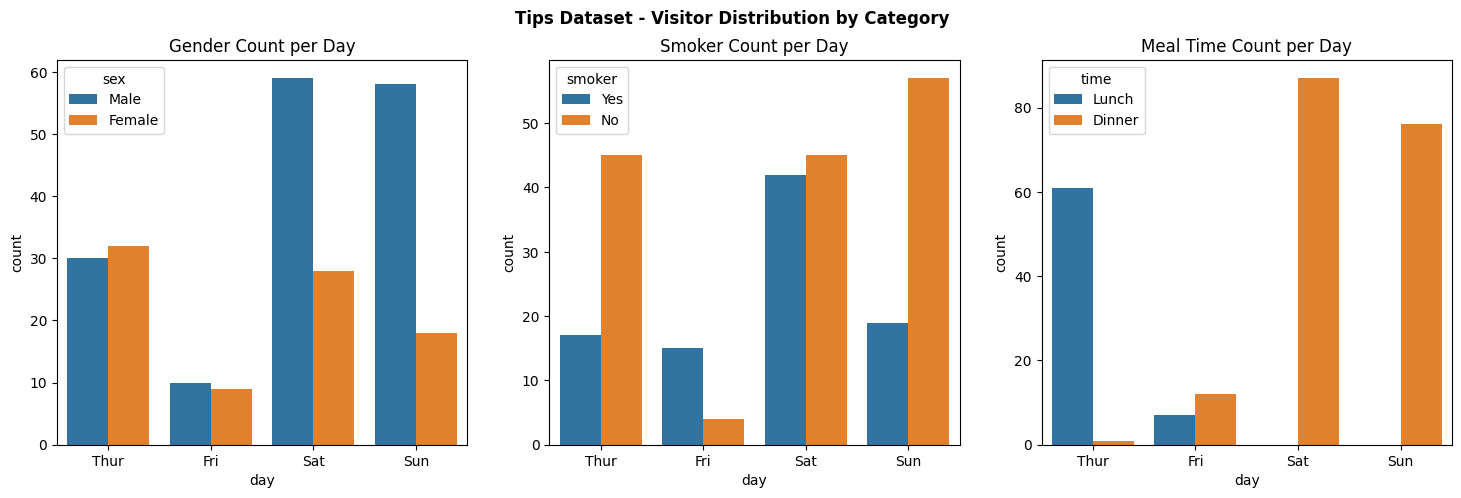

In [5]:
fig = plt.figure(figsize=(18,5))

area1 = fig.add_subplot(1,3,1)
area2 = fig.add_subplot(1,3,2)
area3 = fig.add_subplot(1,3,3)

sns.barplot(x='day',y='count',hue='sex',data=gender_df,ax=area1)
sns.barplot(x='day',y='count',hue='smoker',data=smoke_df,ax=area2)
sns.barplot(x='day',y='count',hue='time',data=time_df,ax=area3)

fig.suptitle('Tips Dataset - Visitor Distribution by Category',fontweight='bold')
area1.set_title('Gender Count per Day')
area2.set_title('Smoker Count per Day')
area3.set_title('Meal Time Count per Day')

plt.show()

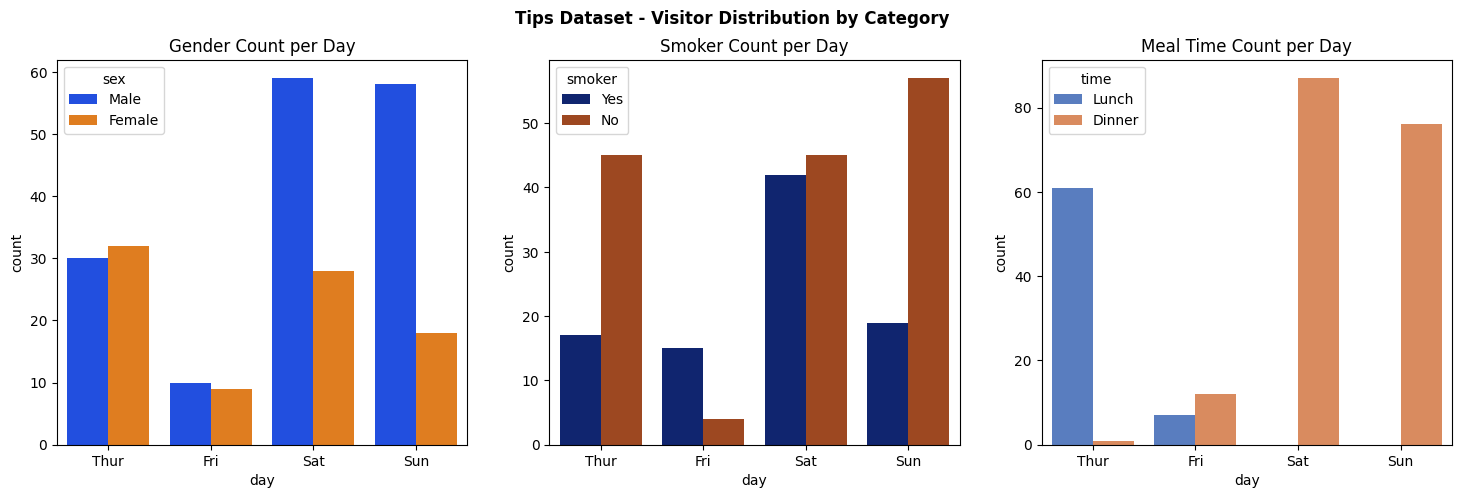

In [6]:
fig = plt.figure(figsize=(18,5))

area1 = fig.add_subplot(1,3,1)
area2 = fig.add_subplot(1,3,2)
area3 = fig.add_subplot(1,3,3)

sns.countplot(x='day',hue='sex',data=tips,palette='bright',ax=area1)
sns.countplot(x='day',hue='smoker',data=tips,palette='dark',ax=area2)
sns.countplot(x='day',hue='time',data=tips,palette='muted',ax=area3)

fig.suptitle('Tips Dataset - Visitor Distribution by Category',fontweight='bold')
area1.set_title('Gender Count per Day')
area2.set_title('Smoker Count per Day')
area3.set_title('Meal Time Count per Day')

plt.show()

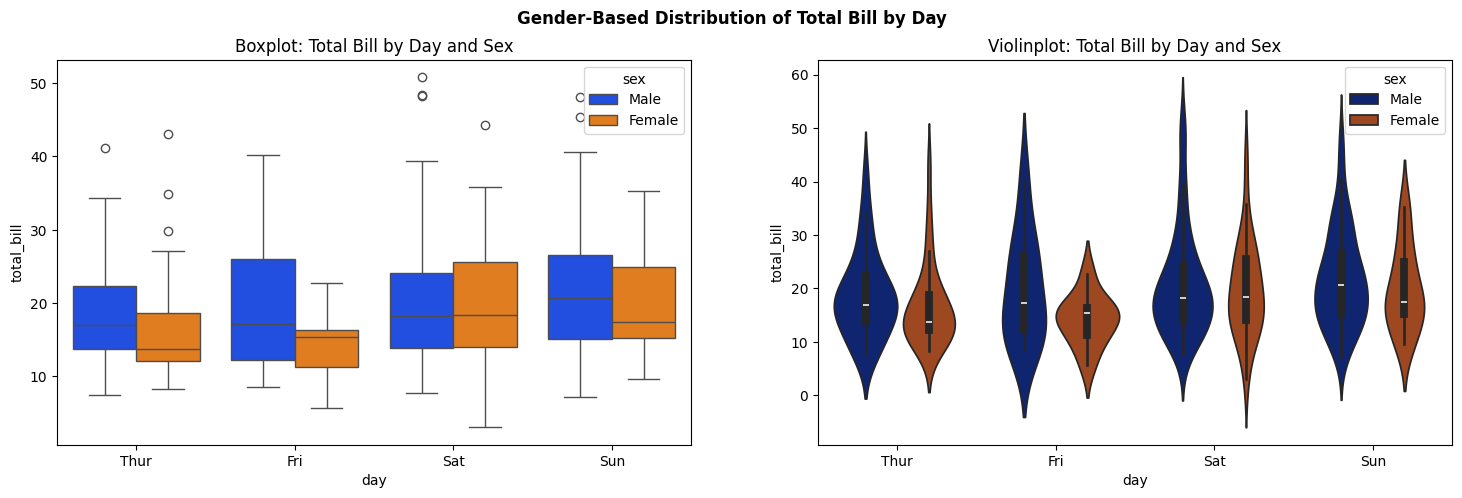

In [7]:
fig = plt.figure(figsize=(18,5))

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

sns.boxplot(data=tips,x='day',y='total_bill',hue='sex',palette='bright',ax=area1)
sns.violinplot(data=tips,x='day',y='total_bill',hue='sex',palette='dark',ax=area2)

fig.suptitle('Gender-Based Distribution of Total Bill by Day',fontweight='bold')
area1.set_title('Boxplot: Total Bill by Day and Sex')
area2.set_title('Violinplot: Total Bill by Day and Sex')

plt.show()

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


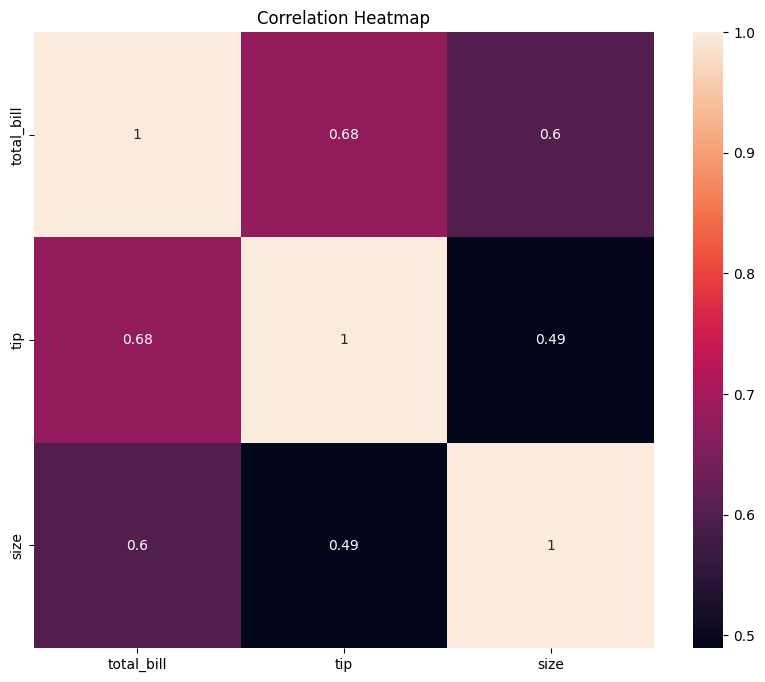

In [9]:
final = tips.loc[:,['total_bill','tip','size']]
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')

correlation = final.corr()
print(correlation)

sns.heatmap(correlation, annot=True)
plt.show()